# Recurrent Convolutional Neural Network

## Import Dependencies

In [5]:
%matplotlib inline
from imp import reload

import itertools
import numpy as np
import utils; reload(utils)

from utils import *
from __future__ import print_function
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [6]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

from IPython.display import SVG
from IPython.display import Image

## Configure Parameters

In [25]:
# Embedding
embedding_size = 50
max_features = 5000
maxlen = 400

# Convolution
kernel_size = 5
pool_size = 4
filters = 64

# LSTM
lstm_output_size = 70

# Training
batch_size = 64
epochs = 4

## Data Preparation

In [21]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [22]:
# Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('Train data size:', x_train.shape)
print('Test data size:', x_test.shape)

Train data size: (25000, 100)
Test data size: (25000, 100)


## Modelling

In [23]:
model = Sequential()

# Embedding layer
model.add(Embedding(max_features, 
                    embedding_size, 
                    input_length=maxlen))
model.add(Dropout(0.25))

# Convolutional layer
model.add(Conv1D(filters,
                kernel_size,
                padding='valid',
                activation='relu',
                strides=1))
model.add(MaxPooling1D(pool_size=pool_size))

# LSTM layer
model.add(LSTM(lstm_output_size))

# Squash
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

# plot_model(model, to_file='model.png', show_shapes=True)
# Image(filename = 'model.png')
# SVG(model_to_dot(model).create(prog='dot', format='svg'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 96, 64)            41024     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 70)                37800     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 71        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total para

## Evaluation

In [24]:
# Train the model
model.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         validation_data=(x_test, y_test),
         verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 43s - loss: 0.3856 - acc: 0.8174 - val_loss: 0.3453 - val_acc: 0.8531
Epoch 2/4
25000/25000 [==============================] - 41s - loss: 0.1975 - acc: 0.9248 - val_loss: 0.3872 - val_acc: 0.8508
Epoch 3/4
25000/25000 [==============================] - 42s - loss: 0.0933 - acc: 0.9686 - val_loss: 0.4206 - val_acc: 0.8436
Epoch 4/4
25000/25000 [==============================] - 40s - loss: 0.0412 - acc: 0.9865 - val_loss: 0.5652 - val_acc: 0.8409


In [12]:
# Evaluate model
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
preds = model.predict_classes(x_test, batch_size=batch_size)

24930/25000 [============================>.] - ETA: 0s

In [14]:
# Save the model weights
model_path = 'data/imdb/models/'
model.save_weights(model_path + 'rcnn.model')

[[10925  1575]
 [ 2526  9974]]


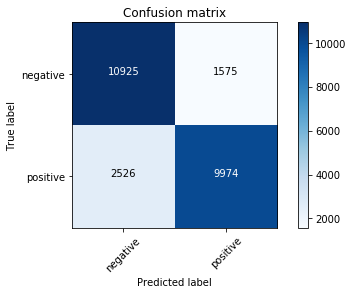

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, {'negative': 0, 'positive': 1})

In [16]:
# F1 score
f1_macro = f1_score(y_test, preds, average='macro') 
f1_micro = f1_score(y_test, preds, average='micro')

print('Test accuracy:', acc)
print('Test score (loss):', score)
print('')
print('F1 Score (Macro):', f1_macro)
print('F1 Score (Micro):', f1_micro)

Test accuracy: 0.835960061097
Test score (loss): 0.59008827377

F1 Score (Macro): 0.83572228331
F1 Score (Micro): 0.83596
